# Investment Analysis Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Checkpoint 1: Data Cleaning 1

#### Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

##### Read the file companies.csv

In [3]:
companies = pd.read_csv('companies.csv', encoding='unicode_escape')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


##### Read the file rounds.csv

In [6]:
rounds2 = pd.read_csv('rounds2.csv', encoding='unicode_escape')

In [7]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


##### Convert the companies.permalink and rounds2.comapy_permalink to lower case.
We are performing this operation as permalink given in both the dataframe are not in same case.

In [9]:
companies.permalink = companies.permalink.str.lower()

In [10]:
rounds2.company_permalink = rounds2.company_permalink.str.lower()

##### To know the number of unique comapnies in the companies dataframe

In [11]:
len(companies.permalink.unique())

66368

##### To know the number of unique comapnies in the rounds2 dataframe

In [12]:
len(rounds2.company_permalink.unique())

66370

 ###### Q)Are there any companies in the rounds2 file which are not present in companies?
 - rounds2 dataframe has 2(66370 - 66368) companines which are not present in companies dataframe. 

##### Merge companies and round2 dataframe into master_frame dataframe

In [13]:
master_frame = companies.merge(rounds2, left_on='permalink', right_on='company_permalink', how='inner')

In [14]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [15]:
# Remove dupliacted columns
master_frame = master_frame.drop(columns = ['company_permalink'])

In [16]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114942 non-null  object 
 1   name                     114941 non-null  object 
 2   homepage_url             108810 non-null  object 
 3   category_list            111535 non-null  object 
 4   status                   114942 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94422 non-null   object 
 10  funding_round_permalink  114942 non-null  object 
 11  funding_round_type       114942 non-null  object 
 12  funding_round_code       31139 non-null   object 
 13  funded_at                114942 non-null  object 
 14  rais

###### Q)How many observations are present in master_frame?
-  (114942, 15)

## Checkpoint 2: Funding Type Analysis
This is the first of the three goals of data analysis – investment type analysis.

- Dropping the rows other than seed, angel, venture and private_equity funding_round_type

In [17]:
master_frame = master_frame[master_frame.funding_round_type.isin(['seed','angel','venture','private_equity'])]
master_frame.funding_round_type.value_counts()

venture           55493
seed              30518
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64

In [18]:
master_frame.raised_amount_usd.value_counts()

1000000.0     2491
2000000.0     1956
10000000.0    1869
5000000.0     1825
500000.0      1779
              ... 
75709.0          1
4797338.0        1
7990819.0        1
3995369.0        1
22414.0          1
Name: raised_amount_usd, Length: 18324, dtype: int64

In [19]:
master_frame.raised_amount_usd.dtype

dtype('float64')

- Checking the null count in raised_amount_usd varibale

In [20]:
(master_frame.raised_amount_usd.isnull().sum()/len(master_frame))*100

14.582053183599959

- As the raised_amount_usd has 14% of null values. So we can remove these rows as it do not effect on our computing representive values

In [21]:
master_frame[master_frame.raised_amount_usd.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
33,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN
42,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,NaN,01-02-2014,NaN
51,/organization/1006-tv,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009,/funding-round/a3631227d5232aa8c2303f252c4f1f87,angel,NaN,01-01-2011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114892,/organization/zymr-inc-,"Zymr, Inc.",http://www.zymr.com,Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA,CA,SF Bay Area,Santa Clara,NaN,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,NaN,12-12-2012,NaN
114898,/organization/zynergy-projects-services,Zynergy Projects & Services,http://www.zynergygroup.net/,Clean Technology,operating,IND,25,Chennai,Chennai,NaN,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,NaN,19-08-2015,NaN
114906,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,NaN,01-01-2007,NaN
114920,/organization/zypsee,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,operating,USA,NY,New York City,New York,01-01-2011,/funding-round/c67e22c5448435adaf5a2d101e449dde,seed,NaN,26-07-2013,NaN


In [22]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [23]:
master_frame.raised_amount_usd.isnull().sum()

0

In [24]:
master_frame.raised_amount_usd = master_frame.raised_amount_usd.astype("float64")

In [25]:
master_frame.raised_amount_usd.dtype

dtype('float64')

In [26]:
master_frame.raised_amount_usd.describe()

count    8.062600e+04
mean     9.348091e+06
std      7.562986e+07
min      0.000000e+00
25%      4.000000e+05
50%      2.000000e+06
75%      7.976016e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [27]:
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09
seed,23602.0,7.197796e+05,2.221772e+06,0.0,55000.00,275000.0,1000000.0,2.000000e+08
venture,50228.0,1.174895e+07,8.635207e+07,0.0,1600901.75,5000000.0,12000000.0,1.760000e+10


- Taking the median value as the representive of the invested amount becuase the mean value is more close to 75th percentile so the data has outliers i.e. few investment amount is quite large than the expected amount for a funding type.
- For private_equity the median value is 20 million USD which is quite large, whereas for venture type, the median value is 5 million.
- As Spark Funds wants to invest between 5 to 15 million USD per investment round, the investment type is the most suitable for it is 'venture'.

##### Filter the data only with venture investment type

In [28]:
master_frame[master_frame.funding_round_type =='venture']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114924,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0
114927,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114929,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
114930,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0


In [29]:
master_frame_venture = master_frame[master_frame.funding_round_type =='venture']

In [30]:
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114934
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                50228 non-null  object 
 1   name                     50228 non-null  object 
 2   homepage_url             47620 non-null  object 
 3   category_list            49726 non-null  object 
 4   status                   50228 non-null  object 
 5   country_code             48111 non-null  object 
 6   state_code               47367 non-null  object 
 7   region                   47515 non-null  object 
 8   city                     47515 non-null  object 
 9   founded_at               40597 non-null  object 
 10  funding_round_permalink  50228 non-null  object 
 11  funding_round_type       50228 non-null  object 
 12  funding_round_code       28043 non-null  object 
 13  funded_at                50228 non-null  object 
 14  raised_amount_usd    

## Checkpoint 3: Country Analysis
This is the second goal of analysis — country analysis

In [31]:
master_frame_venture.country_code.isnull().sum()/len(master_frame_venture)

0.04214780600461894

In [32]:
master_frame_venture[master_frame_venture.country_code.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
95,/organization/1234enter,1234ENTER,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,150267.0
100,/organization/123greetings,123Greetings,http://www.123greetings.com/,Internet,operating,NaN,NaN,NaN,NaN,01-05-1997,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,NaN,23-07-2015,5400000.0
133,/organization/17-media,17 Media,http://17.media,NaN,operating,NaN,NaN,NaN,NaN,15-07-2015,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10000000.0
145,/organization/1800diapers,1800Diapers,NaN,Baby Accessories|Kids,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/5e2b8cd8ad0dcdff961fd09dee78d487,venture,B,04-12-2007,7000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114443,/organization/zkey-com,Zkey.com,http://zkey.com/,NaN,closed,NaN,NaN,NaN,NaN,NaN,/funding-round/aca95e6dda1b354ebee80bca5f261607,venture,B,22-11-1999,10000000.0
114446,/organization/zlango,Zlango,http://www.zlango.com,NaN,closed,NaN,NaN,NaN,NaN,NaN,/funding-round/203baf1c533923de0bc50699a12f447e,venture,A,12-02-2007,12000000.0
114505,/organization/zolk-c,Zolk C,http://www.zolkc.com,Games|Mobile,operating,NaN,NaN,NaN,NaN,01-11-2007,/funding-round/327f2828712fa42899d272320ec31be6,venture,NaN,13-01-2012,636731.0
114639,/organization/zootcard,Zootcard,http://www.zootcard.com,Curated Web,operating,NaN,NaN,NaN,NaN,01-06-2012,/funding-round/c662b7cb18f7be11f811cc9c5b504bb6,venture,NaN,26-06-2014,750000.0


- As the country-code has 4% of null values. Dropping these rows as they do not add value to the country_wise analysis

In [33]:
master_frame_venture = master_frame_venture[~(master_frame_venture.country_code.isnull())]

In [34]:
master_frame_venture.country_code.isnull().sum()

0

In [35]:
master_frame_venture.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0


In [36]:
top9 = pd.DataFrame(master_frame_venture.groupby(['country_code'])['raised_amount_usd'].sum().nlargest(9))

In [37]:
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


- top9 has top nine countries(based on the total investment amount each country has received).
- Wiki to check the countries where english is an official language - https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language
- So the top 3 english speaking countries are - USA, GBR, IND

## Checkpoint 4: Sector Analysis 1
This is the third goal of analysis — sector analysis.

- Dropping the rows which have null have in category_list

In [38]:
master_frame_venture.category_list.isnull().sum()/len(master_frame_venture)

0.00627715075554447

In [39]:
master_frame_venture = master_frame_venture[~master_frame.category_list.isnull()]

In [40]:
master_frame_venture.category_list.isnull().sum()

0

In [41]:
master_frame_venture.category_list.value_counts()

Biotechnology                                                                              5402
Software                                                                                   3960
Health Care                                                                                1375
Clean Technology                                                                           1268
Enterprise Software                                                                        1149
                                                                                           ... 
Curated Web|Local|Professional Services                                                       1
Elder Care|Elderly|Social Innovation                                                          1
Apps|Curated Web|Mobile|Social Media|Social Media Marketing|Software                          1
Open Source|Opinions|Social Media|Startups                                                    1
Artificial Intelligence|Internet of Thin

- Extract the primary sector of each category list from the category_list column

In [42]:
master_frame_venture['primary_sector'] = master_frame_venture.category_list.apply(lambda x: str(x).split('|')[0])

In [43]:
master_frame_venture.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics


In [44]:
master_frame_venture.primary_sector.value_counts()

Biotechnology          6794
Software               4102
Advertising            2215
Health Care            1804
Enterprise Software    1752
                       ... 
Physical Security         1
English-Speaking          1
Collectibles              1
Online Scheduling         1
mHealth                   1
Name: primary_sector, Length: 603, dtype: int64

##### Read the file mapping.csv

In [45]:
mapping = pd.read_csv('mapping.csv', encoding='unicode_escape')

In [46]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [47]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [48]:
pd.set_option('display.max_rows', len(master_frame_venture))

In [49]:
mapping.category_list.value_counts()

Social CRM                               1
Electronic Health Records                1
Brewing                                  1
Video on Demand                          1
Consumer Internet                        1
Batteries                                1
Computer Vision                          1
Enterprise 2.0                           1
Browser Extensions                       1
Email Newsletters                        1
Graphics                                 1
Service Industries                       1
Energy                                   1
Market Research                          1
High Schools                             1
Hedge Funds                              1
Outsourcing                              1
Professio0l Services                     1
Social Media Ma0gement                   1
New Technologies                         1
Fantasy Sports                           1
Identity Ma0gement                       1
Ediscovery                               1
Web Tools  

- Some of the category_list values have spelling errors
 - 0vigation instead of Navigation
 - Gover0nce instead of Governance
 - Lead Ma0gement instead of Lead Management
- So replacing '0' with 'na'
- Converting mapping.category_list and master_frame_venture.primary_sector to lower case.

In [50]:
mapping.category_list = mapping.category_list.apply(lambda x: str(x).replace('0', 'na'))

In [51]:
mapping.category_list = mapping.category_list.str.lower()

In [52]:
master_frame_venture.primary_sector = master_frame_venture.primary_sector.str.lower()

- Forming a main_sector column in mapping dataframe

In [53]:
mapping = mapping.drop(columns = ['Blanks'], axis=1)

In [54]:
mapping = mapping[~(mapping.category_list == 'nan')]

In [55]:
value_var = list(mapping.columns[1:])
id_var = list(np.setdiff1d(mapping.columns, value_var))

mapping_long = pd.melt(mapping, id_vars= id_var, value_vars= value_var, var_name='main_sector')
mapping_long.head()

,category_list,main_sector,value
0,3d,Automotive & Sports,0
1,3d printing,Automotive & Sports,0
2,3d technology,Automotive & Sports,0
3,accounting,Automotive & Sports,0
4,active lifestyle,Automotive & Sports,0


In [56]:
mapping_long = mapping_long[mapping_long.value == 1]
mapping_long = mapping_long.drop('value', axis=1)
mapping_long.head()

,category_list,main_sector
7,adventure travel,Automotive & Sports
13,aerospace,Automotive & Sports
44,auto,Automotive & Sports
45,automated kiosk,Automotive & Sports
46,automotive,Automotive & Sports


- Forming main_sector column in dataframe by mapping the primary sector of master_frame_venture with mapping.category_list

In [57]:
master_frame_venture['main_sector'] = master_frame_venture['primary_sector'].map(mapping_long.set_index('category_list')['main_sector'])

In [58]:
master_frame_venture.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,Entertainment
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,curated web,"News, Search and Messaging"
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,biotechnology,Cleantech / Semiconductors
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,analytics,"Social, Finance, Analytics, Advertising"
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,analytics,"Social, Finance, Analytics, Advertising"


In [59]:
master_frame_venture.main_sector.isnull().sum()/len(master_frame_venture)*100

0.04183312765378904

In [60]:
master_frame_venture[master_frame_venture.main_sector.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
8094,/organization/asia-translate,Asia Translate,http://www.asiatranslate.net,English-Speaking|Translation,operating,SGP,NaN,Singapore,Singapore,03-09-2009,/funding-round/0e445561d485e211ccc409be15562dd9,venture,NaN,01-09-2009,20000.0,english-speaking,NaN
17605,/organization/cartpay-co-,CartPay Co.,http://cartpay.co,Enterprise Hardware|Retail,operating,RUS,66,St. Petersburg,Saint Petersburg,01-06-2014,/funding-round/fbe5ea27c9c23ca0075a0f2bd1be5fba,venture,NaN,01-03-2015,50000.0,enterprise hardware,NaN
20328,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,http://cleanvehiclesolutions.com,Natural Gas Uses|Service Providers|Services,operating,USA,NJ,Newark,East Brunswick,NaN,/funding-round/7b991c526219c2edff8789942215d93b,venture,NaN,26-02-2010,125000.0,natural gas uses,NaN
22940,/organization/consensus-point,Consensus Point,http://www.consensuspoint.com,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,TN,Nashville,Nashville,01-01-2006,/funding-round/11ad1d209af6e06e87467f3432aa735f,venture,NaN,19-04-2011,788374.0,enterprise 2.0,NaN
22942,/organization/consensus-point,Consensus Point,http://www.consensuspoint.com,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,TN,Nashville,Nashville,01-01-2006,/funding-round/7cdac9335cdc78285e8dcd1932f8729b,venture,B,18-07-2012,2600000.0,enterprise 2.0,NaN
28541,/organization/dolores-speech-products,Dolores Speech Products,http://doloresspeechproducts.com,Adaptive Equipment|Innovation Management|Speec...,operating,USA,MA,Boston,Wellesley,NaN,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,NaN,07-04-2015,250000.0,adaptive equipment,NaN
35276,/organization/fia-formula-e,FIA Formula E,http://www.fiaformulae.com/,Racing,closed,GBR,F1,GBR - Other,Hammersmith,01-01-2012,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,NaN,15-05-2014,68569234.0,racing,NaN
36010,/organization/five-below,Five Below,http://www.fivebelow.com,Specialty Retail,ipo,USA,PA,Philadelphia,Philadelphia,NaN,/funding-round/2a50c59492585ea4080fa67de755a442,venture,NaN,14-10-2010,194000000.0,specialty retail,NaN
36289,/organization/flexport,Flexport,https://www.flexport.com/,Enterprise 2.0|Enterprise Software|Insurance|L...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2013,/funding-round/e890e1058ab6be04e9559cd34ee6382c,venture,A,06-08-2015,20000000.0,enterprise 2.0,NaN
43504,/organization/healthtell,HealthTell,http://www.healthtell.com,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,CA,SF Bay Area,San Ramon,01-01-2010,/funding-round/8edf7332fface9972541807a248690b3,venture,A,13-06-2014,9486929.0,biotechnology and semiconductor,NaN


In [61]:
master_frame_venture = master_frame_venture[~master_frame_venture.main_sector.isnull()]

In [62]:
master_frame_venture.main_sector.isnull().sum()

0

## Checkpoint 5: Sector Analysis 2

In [63]:
master_frame_venture.raised_amount_usd.dtype

dtype('float64')

- The range of funding preferred by Spark Funds is 5 to 15 million USD, Therefore, filter the data with the reuired raised_amount_usd.

In [64]:
master_frame_venture = master_frame_venture[((master_frame_venture['raised_amount_usd'] >= 5000000) & (master_frame_venture['raised_amount_usd'] <= 15000000))]

In [65]:
D1 = master_frame_venture[master_frame_venture.country_code=='USA']

In [66]:
D1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,analytics,"Social, Finance, Analytics, Advertising"
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,apps,"News, Search and Messaging"
103,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,service providers,Others
110,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,manufacturing,Manufacturing
111,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,manufacturing,Manufacturing


In [67]:
D2 = master_frame_venture[master_frame_venture.country_code=='GBR']

In [68]:
D2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
401,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,android,"Social, Finance, Analytics, Advertising"
864,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,content creators,Entertainment
865,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,content creators,Entertainment
942,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,media,Entertainment
943,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,media,Entertainment


In [69]:
D3 = master_frame_venture[master_frame_venture.country_code=='IND']

In [70]:
D3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,Entertainment
227,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,e-commerce,Others
1049,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,finance,"Social, Finance, Analytics, Advertising"
2507,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,entertainment,Entertainment
3457,/organization/agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,finance,"Social, Finance, Analytics, Advertising"


In [71]:
D1.raised_amount_usd.count()

12063

In [72]:
D2.raised_amount_usd.count()

621

In [73]:
D3.raised_amount_usd.count()

328

In [74]:
D1.raised_amount_usd.sum()

107757097294.0

In [75]:
D2.raised_amount_usd.sum()

5379078691.0

In [76]:
D3.raised_amount_usd.sum()

2949543602.0

In [77]:
D1.groupby(['main_sector'])['raised_amount_usd'].count().nlargest(10)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [78]:
D2.groupby(['main_sector'])['raised_amount_usd'].count().nlargest(10)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [79]:
D3.groupby(['main_sector'])['raised_amount_usd'].count().nlargest(10)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [80]:
D1[D1['main_sector']=='Others'].nlargest(1, 'raised_amount_usd').name

191    1stdibs
Name: name, dtype: object

In [81]:
D2[D2['main_sector']=='Others'].nlargest(1, 'raised_amount_usd').name

9921    Azure Solutions
Name: name, dtype: object

In [82]:
D3[D3['main_sector']=='Others'].nlargest(1, 'raised_amount_usd').name

16958    CaratLane
Name: name, dtype: object

In [83]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].nlargest(1, 'raised_amount_usd').name

2530    Admeld
Name: name, dtype: object

In [84]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].nlargest(1, 'raised_amount_usd').name

65376    myThings
Name: name, dtype: object

In [85]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].nlargest(1, 'raised_amount_usd').name

6313    ApnaPaisa
Name: name, dtype: object

- For country USA
 1. Total number of investments (count) - 12063
 2. Total amount of investment (USD) - 107757097294.0
 3. Top sector (based on count of investments) - Others
 4. Second-best sector (based on count of investments) - Social, Finance, Analytics, Advertising
 5. Third-best sector (based on count of investments) - Cleantech / Semiconductors
 6. Number of investments in the top sector (refer to point 3) - 2950
 7. Number of investments in the second-best sector (refer to point 4) - 2714
 8. Number of investments in the third-best sector (refer to point 5) - 2350
 9. For the top sector count-wise (point 3), which company received the highest investment - 1stdibs
 10. For the second-best sector count-wise (point 4), which company received the highest investment - Admeld
 
- For country GBR
 1. Total number of investments (count) - 621
 2. Total amount of investment (USD) - 5379078691
 3. Top sector (based on count of investments) - Others
 4. Second-best sector (based on count of investments) - Social, Finance, Analytics, Advertising
 5. Third-best sector (based on count of investments) - Cleantech / Semiconductors
 6. Number of investments in the top sector (refer to point 3) - 143
 7. Number of investments in the second-best sector (refer to point 4) - 133
 8. Number of investments in the third-best sector (refer to point 5) - 130
 9. For the top sector count-wise (point 3), which company received the highest investment - Azure Solutions
 10. For the second-best sector count-wise (point 4), which company received the highest investment - myThings

- For country IND
 1. Total number of investments (count) - 328
 2. Total amount of investment (USD) - 2949543602
 3. Top sector (based on count of investments) - Others
 4. Second-best sector (based on count of investments) - Social, Finance, Analytics, Advertising
 5. Third-best sector (based on count of investments) - News, Search and Messaging
 6. Number of investments in the top sector (refer to point 3) - 110
 7. Number of investments in the second-best sector (refer to point 4) - 60
 8. Number of investments in the third-best sector (refer to point 5) - 52
 9. For the top sector count-wise (point 3), which company received the highest investment - CaratLane
 10. For the second-best sector count-wise (point 4), which company received the highest investment - ApnaPaisa

## Checkpoint 6: Plots

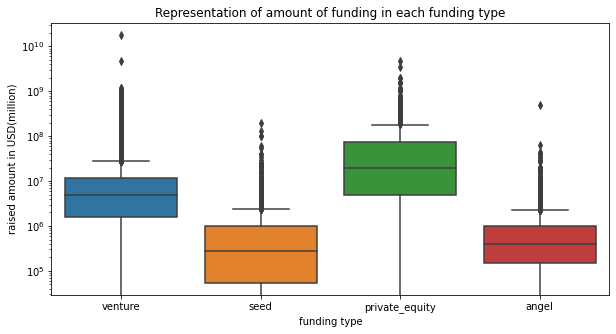

In [86]:
plt.figure(figsize=[10,5])
sns.boxplot(master_frame['funding_round_type'], master_frame['raised_amount_usd'])
plt.yscale('log')
plt.ylabel('raised amount in USD(million)')
plt.title('Representation of amount of funding in each funding type')
plt.xlabel('funding type')
plt.show()

- For private_equity the median value is 20 million USD which is quite large, whereas for venture type, the median value is 5 million.
- As Spark Funds wants to invest between 5 to 15 million USD per investment round, the investment type is the most suitable for it is 'venture'.

Text(0, 0.5, 'Total amount of investment')

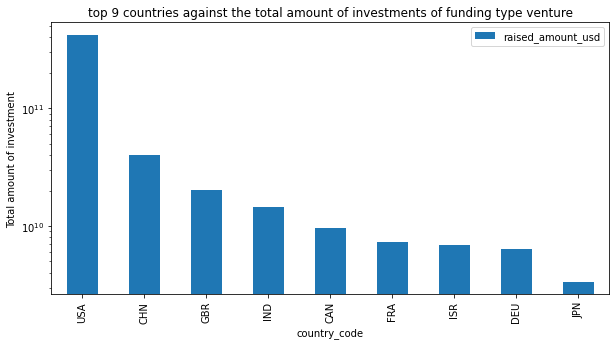

In [87]:
top9.plot(kind='bar', figsize=[10,5])
plt.yscale('log')
plt.title('top 9 countries against the total amount of investments of funding type venture')
plt.ylabel('Total amount of investment')

- Top 3 countries are 'USA', 'CHN' and 'GBR'. but China is not a english speaking country.So the top 3 senglish speaking countries are 'USA', 'GBR', 'IND'.

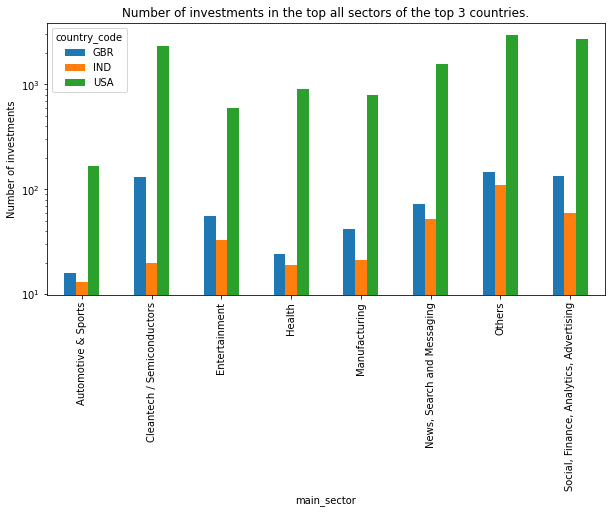

In [88]:
master_frame_venture_1 = master_frame_venture[master_frame_venture['country_code'].isin(['USA','GBR','IND'])]
pd.pivot_table(master_frame_venture_1, index=master_frame_venture_1[['main_sector']], values='country_code', columns=master_frame_venture_1['country_code'], aggfunc='count').plot(kind='bar', figsize=[10,5])
plt.yscale('log')
plt.title('Number of investments in the top all sectors of the top 3 countries.')
plt.ylabel('Number of investments')
plt.show()

- For USA, the top 3 sectors are 'Others', 'Social,Finance,Analytics,Advertising', 'Cleantech/Semicondustors'.
- For GBR, the top 3 sectors are 'Others', 'Social,Finance,Analytics,Advertising', 'Cleantech/Semicondustors'.
- For IND, the top 3 sectors are 'Others', 'Social,Finance,Analytics,Advertising', 'News,Search and Messaging'.